<center> <h1> <font color ="blue"> Mini Project - Texas Bridge Condition Analysis </font> </h1> </center>

In this project, we will process bridge data from Texas for the years 2022 and 2023. We aim to predict bridge conditions using logistic regression, display the results visually, and identify bridges surveyed in 2023 but not in 2022.

In [1]:
#Import libraries
import os #Operating System interactions
import pandas as pd #Panel Data - for working with tabular data
import geopandas as gp # for GIS analysis or Geo Processing
from shapely.geometry import Point #Allows you to vreate gpkg files from xy data
import numpy as np #Numerical Calc
from matplotlib import pyplot as plt 
import matplotlib_map_utils as mapu #Alias of Map Utils like 'plt' for plot. For North Arrow.

In [2]:
#Set the directories
path = 'C:/Users/aksha/Downloads/Mini Project'
os.chdir(path) #Change the directory to that path

In [3]:
fname1 = 'Texas_County.gpkg'
texas = gp.read_file(fname1)

In [4]:
crs = texas.crs
print("CRS:", crs)

CRS: EPSG:3857


In [5]:
# Reproject the data to WGS84 (EPSG:4326)
texas_wgs84 = texas.to_crs(epsg=4326)

In [6]:
crs = texas_wgs84.crs
print("CRS:", crs)

CRS: EPSG:4326


In [7]:
texas_wgs84.head()

,GID,CMPTRL_NBR,CNTY_NM,DIST_NM,DPS_NBR,CNTY_FIPS,CNTY_NBR,DIST_NBR,MSA1990,MSA2000,MSA2010,GlobalID,geometry
0,29,7,Atascosa,San Antonio,7,48013,7,15,Y,Y,Y,{5024B0A9-D5E0-4E6A-9655-10EA956E9CDF},"MULTIPOLYGON (((-98.25038 28.67505, -98.24387 ..."
1,30,158,Matagorda,Yoakum,161,48321,158,13,N,N,N,{561E01F6-DDE9-4BAD-89A3-C7F809943987},"MULTIPOLYGON (((-95.84101 29.17299, -95.8411 2..."
2,31,120,Jackson,Yoakum,120,48239,121,13,N,Y,Y,{BE92BEA2-4DB2-451F-B104-947B967D9853},"MULTIPOLYGON (((-96.36618 29.01247, -96.36787 ..."
3,32,62,De Witt,Yoakum,62,48123,62,13,N,N,N,{08CDBCF3-2214-4849-A1EF-97538C8CCFA7},"MULTIPOLYGON (((-97.24011 29.38455, -97.24587 ..."
4,33,247,Wilson,San Antonio,247,48493,247,15,Y,Y,Y,{FCA032FD-BBCC-4A83-A205-489A5DA70038},"MULTIPOLYGON (((-98.13515 29.43866, -98.13517 ..."


In [8]:
type(texas_wgs84)

geopandas.geodataframe.GeoDataFrame

In [9]:
print(texas_wgs84.crs)

EPSG:4326


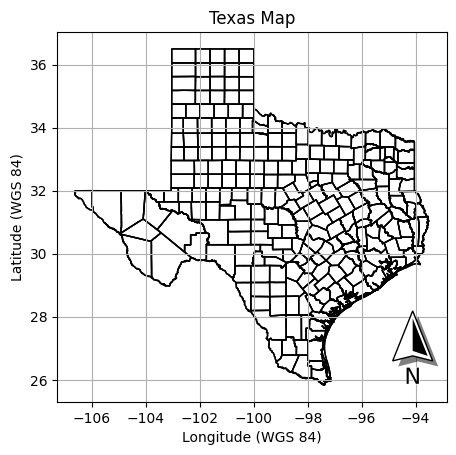

In [10]:
#Visualize the overlay result (you can customise this based on your needs)
fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
texas_wgs84.plot (facecolor='white', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
texas_wgs84.plot(ax=ax1, color='none', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (WGS 84)')
ax1.set_ylabel('Latitude (WGS 84)')
plt.grid()
plt.title ('Texas Map')
plt.show()

In [11]:
df_2022 = pd.read_csv('2022_Data.csv')
df_2023 = pd.read_csv('2023_Data.csv')

C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\1933809344.py:1: DtypeWarning: Columns (5,75,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('2022_Data.csv')
C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\1933809344.py:2: DtypeWarning: Columns (5,75,96) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('2023_Data.csv')


In [12]:
# Function to convert the 8-9 digit lat/lon to decimal degrees (DD)
def dms_to_dd(value):
    # Convert the value to a string to extract parts, and ensure it's positive for parsing
    value_str = str(abs(int(value)))  # Ensure the value is treated as an integer and absolute

    # Extract the seconds (last 4 digits), minutes (2 digits before that), and degrees (rest of the digits)
    seconds = int(value_str[-4:]) / 100  # Seconds are the last four digits, divided by 100
    minutes = int(value_str[-6:-4])      # Minutes are the two digits before the seconds
    degrees = int(value_str[:-6])        # Degrees are everything before the minutes

    # Convert DMS to Decimal Degrees (DD)
    dd = degrees + minutes / 60 + seconds / 3600

    # Return the result as a negative if the original value was negative
    return -dd if value < 0 else dd


In [13]:
# Remove rows with NaN values in the latitude and longitude columns
df_2022 = df_2022.dropna(subset=['LAT_016', 'LONG_017'])
df_2023 = df_2023.dropna(subset=['LAT_016', 'LONG_017'])

# Apply the conversion function to the latitude and longitude columns for 2022
df_2022['LAT_016'] = df_2022['LAT_016'].apply(dms_to_dd)
df_2022['LONG_017'] = df_2022['LONG_017'].apply(lambda x: -dms_to_dd(x))  # Longitude is negative for the western hemisphere

# Convert latitude and longitude columns to numeric, coerce errors to NaN
df_2022['LAT_016'] = pd.to_numeric(df_2022['LAT_016'], errors='coerce')
df_2022['LONG_017'] = pd.to_numeric(df_2022['LONG_017'], errors='coerce')

# Apply the conversion function to the latitude and longitude columns for 2023
df_2023['LAT_016'] = df_2023['LAT_016'].apply(dms_to_dd)
df_2023['LONG_017'] = df_2023['LONG_017'].apply(lambda x: -dms_to_dd(x))  # Longitude is negative for the western hemisphere

# Convert latitude and longitude columns to numeric, coerce errors to NaN
df_2023['LAT_016'] = pd.to_numeric(df_2023['LAT_016'], errors='coerce')
df_2023['LONG_017'] = pd.to_numeric(df_2023['LONG_017'], errors='coerce')

# Print or save the updated DataFrame
print(df_2022[['LAT_016', 'LONG_017']])
print(df_2023[['LAT_016', 'LONG_017']])

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
51717  27.454461  -99.052417
51718  27.457492  -99.031675
51719  27.459867  -99.015361
51720  27.462756  -98.995219
51721  27.454086  -99.054961

[51722 rows x 2 columns]
         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
56308  31.831469 -106.309700
56309  32.717314  -96.936814
56310  32.713853  -96.934181
56311  32.712667  -96.937056
56312  29.476944  -98.424111

[56313 rows x 2 columns]


In [14]:
# Print or save the updated DataFrame 2022
print(df_2022[['LAT_016', 'LONG_017']])
type(df_2023)

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
51717  27.454461  -99.052417
51718  27.457492  -99.031675
51719  27.459867  -99.015361
51720  27.462756  -98.995219
51721  27.454086  -99.054961

[51722 rows x 2 columns]


pandas.core.frame.DataFrame

In [15]:
# Print or save the updated DataFrame 2023
print(df_2023[['LAT_016', 'LONG_017',]])
type(df_2023)

         LAT_016    LONG_017
0      35.315839 -101.935450
1      29.605833  -94.458000
2      29.608167  -94.430333
3      29.614333  -94.544500
4      29.692500  -94.080167
...          ...         ...
56308  31.831469 -106.309700
56309  32.717314  -96.936814
56310  32.713853  -96.934181
56311  32.712667  -96.937056
56312  29.476944  -98.424111

[56313 rows x 2 columns]


pandas.core.frame.DataFrame

In [16]:
structure_2022 = df_2022['STRUCTURE_NUMBER_008']
structure_2023 = df_2023['STRUCTURE_NUMBER_008']

In [17]:
type(structure_2022)

pandas.core.series.Series

In [18]:
new_bridges_2023 = structure_2023[~structure_2023.isin(structure_2022)]

In [19]:
print(new_bridges_2023)

9        000021594-62610
115      010600AA2130001
584      010920004702684
585      010920004702685
586      010920004702686
              ...       
56308    DAPTRABLI018560
56309    NCA1           
56310    NCA2           
56311    NCA3           
56312    NCA6           
Name: STRUCTURE_NUMBER_008, Length: 4519, dtype: object


In [20]:
new_bridges_df = df_2023[df_2023['STRUCTURE_NUMBER_008'].isin(new_bridges_2023)]

In [21]:
type(new_bridges_df)

pandas.core.frame.DataFrame

In [22]:
print(new_bridges_df)

       STATE_CODE_001 STRUCTURE_NUMBER_008  RECORD_TYPE_005A  \
9                  48      000021594-62610                 1   
115                48      010600AA2130001                 1   
584                48      010920004702684                 1   
585                48      010920004702685                 1   
586                48      010920004702686                 1   
...               ...                  ...               ...   
56308              48      DAPTRABLI018560                 1   
56309              48      NCA1                            1   
56310              48      NCA2                            1   
56311              48      NCA3                            1   
56312              48      NCA6                            1   

       ROUTE_PREFIX_005B  SERVICE_LEVEL_005C ROUTE_NUMBER_005D  \
9                      6                   0                 0   
115                    4                   1              2130   
584                    2         

In [23]:
new_bridges_df.to_csv('new_bridges_2023.csv', index=False)

In [24]:
type(new_bridges_df)

pandas.core.frame.DataFrame

In [25]:
latitude = new_bridges_df['LAT_016']
longitude = new_bridges_df['LONG_017']

In [26]:
print(latitude)
print(longitude)

9        32.680500
115      33.371656
584      33.628550
585      33.628522
586      33.637911
           ...    
56308    31.831469
56309    32.717314
56310    32.713853
56311    32.712667
56312    29.476944
Name: LAT_016, Length: 4519, dtype: float64
9        -94.145833
115      -95.774397
584      -96.613514
585      -96.613681
586      -96.616428
            ...    
56308   -106.309700
56309    -96.936814
56310    -96.934181
56311    -96.937056
56312    -98.424111
Name: LONG_017, Length: 4519, dtype: float64


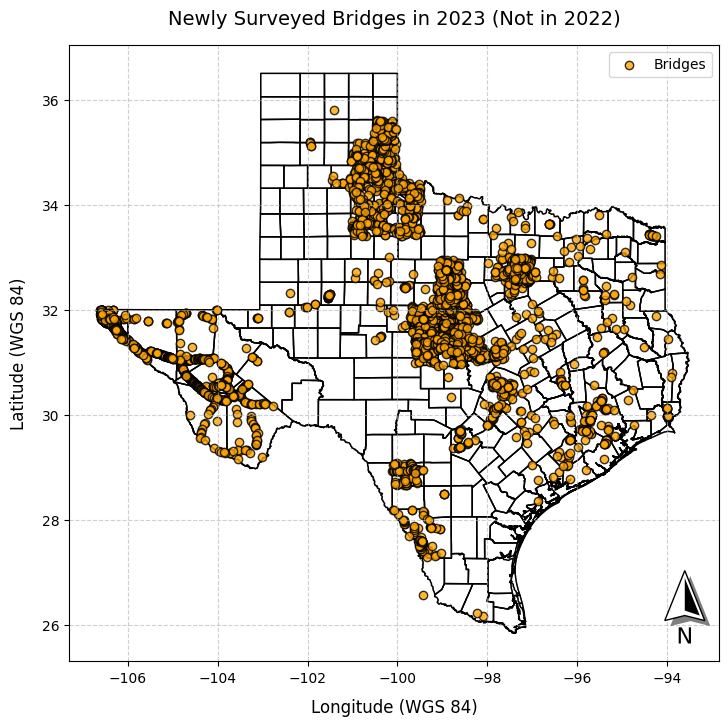

In [28]:
# Visualize the overlay result with updated title, color, and aesthetics

fig = plt.figure(figsize=(10, 8))  # Adjust figure size
ax1 = fig.add_subplot()  # Create subplot for multiple layers

# Plot Texas map boundaries
texas_wgs84.plot(facecolor='white', edgecolor='gray', ax=ax1)  # Use simple white for background and gray for boundaries
texas_wgs84.plot(ax=ax1, color='none', markersize=1)

# Scatter plot for bridge locations
plt.scatter(longitude, latitude, c='orange', marker='o', edgecolor='black', alpha=0.8, label='Bridge Locations')

# Add North Arrow
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees': 0})

# Labeling and aesthetics
ax1.set_xlabel('Longitude (WGS 84)', fontsize=12, labelpad=10)
ax1.set_ylabel('Latitude (WGS 84)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Make grid dashed with more transparency

# Custom legend
plt.legend(['Bridges'], loc='upper right', fontsize=10, frameon=True)

# Save and display with updated title
plt.savefig('updated_bridge_2023_notin_2022.png', dpi=300, bbox_inches='tight')
plt.title('Newly Surveyed Bridges in 2023 (Not in 2022)', fontsize=14, pad=15)
plt.show()


In [29]:
bridge_2023 = pd.read_csv('2023_Data.csv')
new_bridges_2023 = pd.read_csv('new_bridges_2023.csv')

C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\2547144749.py:1: DtypeWarning: Columns (5,75,96) have mixed types. Specify dtype option on import or set low_memory=False.
  bridge_2023 = pd.read_csv('2023_Data.csv')


In [30]:
structure_nums_remove = new_bridges_2023['STRUCTURE_NUMBER_008']
filtered_bridges = bridge_2023[~bridge_2023['STRUCTURE_NUMBER_008'].isin(structure_nums_remove)]

In [31]:
filtered_bridges['AGE'] = 2024 - filtered_bridges['YEAR_BUILT_027']
new_bridges_2023['AGE'] = 2024 - new_bridges_2023['YEAR_BUILT_027']

C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\1894205325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bridges['AGE'] = 2024 - filtered_bridges['YEAR_BUILT_027']


In [32]:
bridge_filtered_cols = filtered_bridges[['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'DECK_COND_058', 
                                         'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 'ADT_029', 
                                         'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']].copy()

In [33]:
# Replace 'N' values with 0 and convert to numeric
columns_to_convert = ['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'CHANNEL_COND_061', 
                      'ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']

In [34]:
new_bridges_2023[columns_to_convert] = new_bridges_2023[columns_to_convert].replace('N', 0).apply(pd.to_numeric, errors='coerce')
filtered_bridges[columns_to_convert] = filtered_bridges[columns_to_convert].replace('N', 0).apply(pd.to_numeric, errors='coerce')

# Binarize condition columns
filtered_bridges['DECK_COND_058'] = filtered_bridges['DECK_COND_058'].apply(lambda x: 1 if x >= 5 else 0)
filtered_bridges['SUPERSTRUCTURE_COND_059'] = filtered_bridges['SUPERSTRUCTURE_COND_059'].apply(lambda x: 1 if x >= 5 else 0)
filtered_bridges['CHANNEL_COND_061'] = filtered_bridges['CHANNEL_COND_061'].apply(lambda x: 1 if x >= 5 else 0)


C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\1382022507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bridges[columns_to_convert] = filtered_bridges[columns_to_convert].replace('N', 0).apply(pd.to_numeric, errors='coerce')
C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\1382022507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bridges['DECK_COND_058'] = filtered_bridges['DECK_COND_058'].apply(lambda x: 1 if x >= 5 else 0)
C:\Users\aksha\AppData\Local\Temp\ipykernel_35644\

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [39]:
# Logistic Regression
X = filtered_bridges[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]
y = filtered_bridges['DECK_COND_058']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with imputation and logistic regression
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic_regression', LogisticRegression())
])

pipe.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipe.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3776   42]
 [ 121 6420]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3818
           1       0.99      0.98      0.99      6541

    accuracy                           0.98     10359
   macro avg       0.98      0.99      0.98     10359
weighted avg       0.98      0.98      0.98     10359



In [43]:
# 1. For Deck Condition
y_deck = filtered_bridges['DECK_COND_058']
X_train_deck, X_test_deck, y_train_deck, y_test_deck = train_test_split(X, y_deck, test_size=0.2, random_state=42)

deck_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic_regression', LogisticRegression())
])

deck_pipeline.fit(X_train_deck, y_train_deck)

# Make predictions for deck condition
# Make predictions for new bridges
X_new = new_bridges_2023[['ADT_029', 'DECK_AREA', 'MAX_SPAN_LEN_MT_048', 'AGE']]
new_predictions = pipe.predict(X_new)
new_bridges_2023['Predicted_DECK_COND_058'] = new_predictions


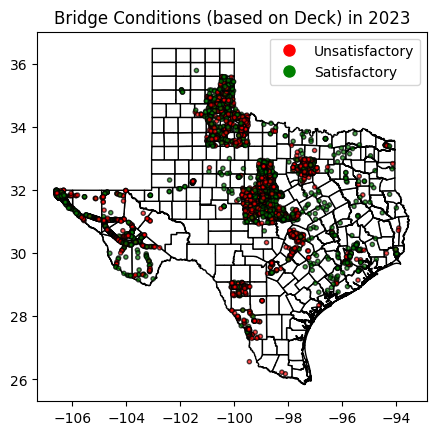

In [55]:
# Plot the results
lat = new_bridges_2023['LAT_016']
lon = new_bridges_2023['LONG_017']
colors = new_bridges_2023['Predicted_DECK_COND_058'].map({0: 'red', 1: 'green'})

fig, ax = plt.subplots()
texas_wgs84.plot(ax=ax, facecolor='white', edgecolor='black')
# Create legend handles manually
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Unsatisfactory', 
                        markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Satisfactory', 
                          markerfacecolor='green', markersize=10)

# Add the custom legend to the plot
plt.legend(handles=[red_patch, green_patch], loc='upper right')
plt.scatter(lon, lat, c=colors, marker='.', edgecolor='k', alpha=0.7)
plt.title('Bridge Conditions (based on Deck) in 2023')
plt.savefig('bridge_2023_Deck_condition.png', dpi=300, bbox_inches='tight')
plt.show()